==================================> 054_discard.json


,ACH_DATE,MEASURE,NAME,VALUE
0,2017-09-01,DIAG_RATE_65_PLUS,WEST YORKSHIRE,73.6
1,2017-09-01,DIAG_RATE_65_PLUS_LL,WEST YORKSHIRE,66.2
2,2017-09-01,DIAG_RATE_65_PLUS_UL,WEST YORKSHIRE,79.8
...,...,...,...,...
9,2017-10-01,DIAG_RATE_65_PLUS,NOTTINGHAMSHIRE,77.5
10,2017-10-01,DIAG_RATE_65_PLUS_LL,NOTTINGHAMSHIRE,69.6
11,2017-10-01,DIAG_RATE_65_PLUS_UL,NOTTINGHAMSHIRE,84.2


,ACH_DATE,DIAG_RATE_65_PLUS,DIAG_RATE_65_PLUS_LL,DIAG_RATE_65_PLUS_UL,NAME
0,2017-09-01,77.0,69.1,83.6,NOTTINGHAMSHIRE
1,2017-10-01,77.5,69.6,84.2,NOTTINGHAMSHIRE
2,2017-09-01,73.6,66.2,79.8,WEST YORKSHIRE
3,2017-10-01,73.7,66.3,80.0,WEST YORKSHIRE


==================================> 054.json


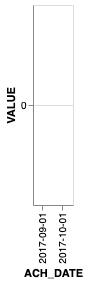

,h,h_bar,x
0,102,76,Label_1
1,124,90,Label_2
2,126,76,Label_3
...,...,...,...
9,102,91,Label_10
10,115,65,Label_11
11,144,79,Label_12


,h,h_bar,x,y2
0,102,76,Label_1,178
1,124,90,Label_2,214
2,126,76,Label_3,202
...,...,...,...,...
9,102,91,Label_10,193
10,115,65,Label_11,180
11,144,79,Label_12,223


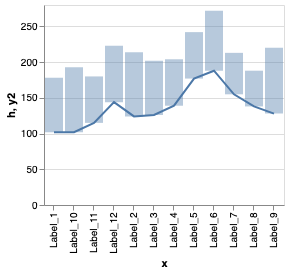

In [4]:
import json
import pandas as pd
import os
from vega import VegaLite
from IPython.display import display, HTML
%run table_utils

pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 10)

CSS = """
div.cell:nth-child(5) .output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))
benchmark_dir = "../benchmarks"

def display_benchmark(fname):
    with open(os.path.join(benchmark_dir, fname), "r") as f:
        benchmark = json.load(f)
        raw_data = benchmark["input_data"]
        vis_data = benchmark["output_data"]
        chart = benchmark["spec"] if "spec" in benchmark else benchmark["vl_spec"]
        in_df = pd.DataFrame.from_records(raw_data)
        out_df = pd.DataFrame.from_records(vis_data)
        display(in_df)
        display(out_df)
        VegaLite(chart, out_df).display()

for fname in os.listdir(benchmark_dir):
    if not fname.endswith(".json"): continue
    if not "054" in fname: continue
    print("==================================> {}".format(fname))
    display_benchmark(fname)

In [2]:
import json
with open("/Users/clwang/Desktop/temp.json", "r") as f:
    x = json.load(f)
    for r in x:
        for key in r:
            if key in ["Peak", "activity"]: continue
            r[key] = round(r[key] * 100000000, 3)
        
with open("/Users/clwang/Desktop/temp2.json", "w") as g:
    json.dump(x, g)
    